In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error

df = pd.read_csv('Base.csv')

target = 'fraud_bool'
# Don't create X_train, X_test here - we'll do temporal split later

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

### Description of the Code Above

This cell performs the following tasks:

1. **Imports necessary libraries**:  
   - `os`, `numpy`, `pandas`, `seaborn`, `matplotlib.pyplot`, and `math` for data handling and visualization.  
   - `sklearn.model_selection`, `preprocessing`, and `metrics` for machine learning utilities.

2. **Mounts Google Drive**:  
   - `drive.mount('/content/drive')` connects our Google Drive to the Colab environment so we can access files like `Base.csv`.

3. **Loads the dataset**:  
   - Reads the CSV file located at `/content/drive/MyDrive/Base.csv` into a pandas DataFrame called `df`.

4. **Prepares target and feature variables**:  
   - `target = 'fraud_bool'` identifies the column we want to predict.  
   - `X` contains the feature columns (input variables), and `y` contains the target column (output variable).

5. **Splits the dataset**:  
   - Uses `train_test_split()` to divide our data into 80% training and 20% testing sets.  
   - The `stratify=y` argument ensures the class distribution (fraud vs. non-fraud) is maintained in both sets.

6. **Displays DataFrame information**:  
   - `df.info()` outputs data types, non-null counts, and memory usage for each column in our dataset.


In [2]:
df.describe() #Basic description of data

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


In [3]:
missing_values = df.isnull().sum() #Check for missing values
num_missing = missing_values.sum()
print(f"Number of missing values in dataset: {num_missing}")

Number of missing values in dataset: 0


In [4]:
#Check the number of duplicate instances
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate instances: {num_duplicates}")

Number of duplicate instances: 0


###  Data Quality Checks: Missing and Duplicate Values

In this step, we perform two important data quality checks to ensure our dataset is clean and ready for analysis:

1. **Check for missing values**:
   ```python
   missing_values = df.isnull().sum()
   num_missing = missing_values.sum()
   print(f"Number of missing values in dataset: {num_missing}")
   ```
   - We calculate the total number of missing (null) values across all columns.
   - This helps us decide whether we need to handle any missing data through imputation or removal.
   - In our case, the result shows that there are **0 missing values**, so no further action is needed here.

2. **Check for duplicate rows**:
   ```python
   num_duplicates = df.duplicated().sum()
   print(f"Number of duplicate instances: {num_duplicates}")
   ```
   - We identify any completely duplicated rows in the dataset.
   - Removing duplicates is important to prevent data leakage or skewed model training.
   - In our dataset, there are **0 duplicate rows**, so we are good to proceed.

These checks confirm that our dataset is clean and doesn’t require immediate preprocessing for missing or duplicate data.


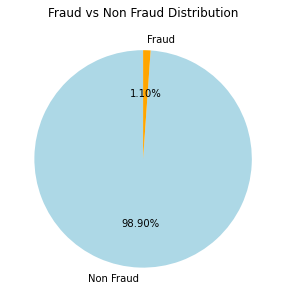

In [5]:
fraud_counts = df['fraud_bool'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(fraud_counts, labels=['Non Fraud', 'Fraud'], autopct='%.2f%%', startangle=90, colors=['lightblue', 'orange'])
plt.title('Fraud vs Non Fraud Distribution')
plt.show()

###  Visualizing Class Distribution: Fraud vs Non-Fraud

In this step, we create a pie chart to visualize the distribution of fraudulent vs. non-fraudulent transactions in our dataset:

```python
fraud_counts = df['fraud_bool'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(fraud_counts, labels=['Non Fraud', 'Fraud'], autopct='%.2f%%', startangle=90, colors=['lightblue', 'orange'])
plt.title('Fraud vs Non Fraud Distribution')
plt.show()
```

#### What this does:
- Calculates the count of each class (fraud and non-fraud) using `value_counts()`.
- Plots those values in a pie chart with:
  - Custom colors (`lightblue` for non-fraud, `orange` for fraud),
  - Percentage labels (`autopct='%.2f%%'`), and
  - A readable layout by rotating the start angle.

#### Insights:
- Our data is **highly imbalanced**, with only **1.1% of transactions labeled as fraud** and **98.9% as non-fraud**.
- This class imbalance is important to address during model training, as it may lead to biased predictions.

We’ll need to keep this imbalance in mind when we build and evaluate our models later (e.g., by using techniques like resampling, class weighting, or specialized metrics).


In [6]:
# Check if device_fraud_count is all zeros
print("\n=== Checking device_fraud_count ===")
print(df['device_fraud_count'].value_counts())
if df['device_fraud_count'].nunique() == 1:
    print("device_fraud_count has only one unique value - will drop it")
    df = df.drop(['device_fraud_count'], axis=1)


=== Checking device_fraud_count ===
0    1000000
Name: device_fraud_count, dtype: int64
device_fraud_count has only one unique value - will drop it


In [7]:
target = 'fraud_bool'
features = df.drop(columns=[target])

categorical_features = features.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = features.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\n=== Feature Types ===")
print(f"Categorical Features ({len(categorical_features)}): {categorical_features}")
print(f"Numerical Features ({len(numerical_features)}): {numerical_features}")



=== Feature Types ===
Categorical Features (5): ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
Numerical Features (25): ['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w', 'month']


### Feature Type Categorization

In this step, we categorize our features into three types: categorical, discrete, and numerical. This helps guide how we handle them during visualization, preprocessing, and model training.

```python
features = df.drop(columns=['fraud_bool'])

categorical_features = features.select_dtypes(include=['object', 'category']).columns.tolist()

discrete_candidates = [feat for feat in features.columns if features[feat].dropna().nunique() <= 10]
discrete_features = list(set(discrete_candidates) - set(categorical_features))

numerical_features = features.select_dtypes(include=['int64', 'float64']).columns.difference(discrete_features).tolist()
```

**What each part does:**
- `categorical_features`: Selects columns with data types commonly used for categories (e.g., strings or labeled types).
- `discrete_candidates`: Looks for columns that have 10 or fewer unique values — common for binary or low-range count data.
- `discrete_features`: Removes overlapping categorical features from the discrete list.
- `numerical_features`: Includes all numeric columns that are **not** already classified as discrete.

**Printed Output:**
- **Categorical Features**:  
  `['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']`

- **Discrete Features**:  
  `['customer_age', 'keep_alive_session', 'email_is_free', 'device_fraud_count', 'device_distinct_emails_8w', 'phone_mobile_valid', 'phone_home_valid', 'foreign_request', 'month', 'has_other_cards', 'income']`

- **Numerical Features**:  
  `['bank_branch_count_8w', 'bank_months_count', 'credit_risk_score', 'current_address_months_count', 'date_of_birth_distinct_emails_4w', 'days_since_request', 'intended_balcon_amount', 'name_email_similarity', 'prev_address_months_count', 'proposed_credit_limit', 'session_length_in_minutes', 'velocity_24h', 'velocity_4w', 'velocity_6h', 'zip_count_4w']`

This breakdown allows us to apply appropriate techniques for analysis and encoding based on the type of each feature.


In [8]:
X = df.drop(columns=[target])
y = df[target]

# Temporal split
X_train = X[X['month'] < 6].copy()
X_test = X[X['month'] >= 6].copy()
y_train = y[X['month'] < 6].copy()
y_test = y[X['month'] >= 6].copy()

# Drop month column after split
X_train = X_train.drop('month', axis=1)
X_test = X_test.drop('month', axis=1)

print(f"\n=== Train-Test Split ===")
print(f"Training set: {X_train.shape[0]:,} samples")
print(f"Test set: {X_test.shape[0]:,} samples")
print(f"Training fraud rate: {y_train.mean()*100:.2f}%")
print(f"Test fraud rate: {y_test.mean()*100:.2f}%")


=== Train-Test Split ===
Training set: 794,989 samples
Test set: 205,011 samples
Training fraud rate: 1.03%
Test fraud rate: 1.40%


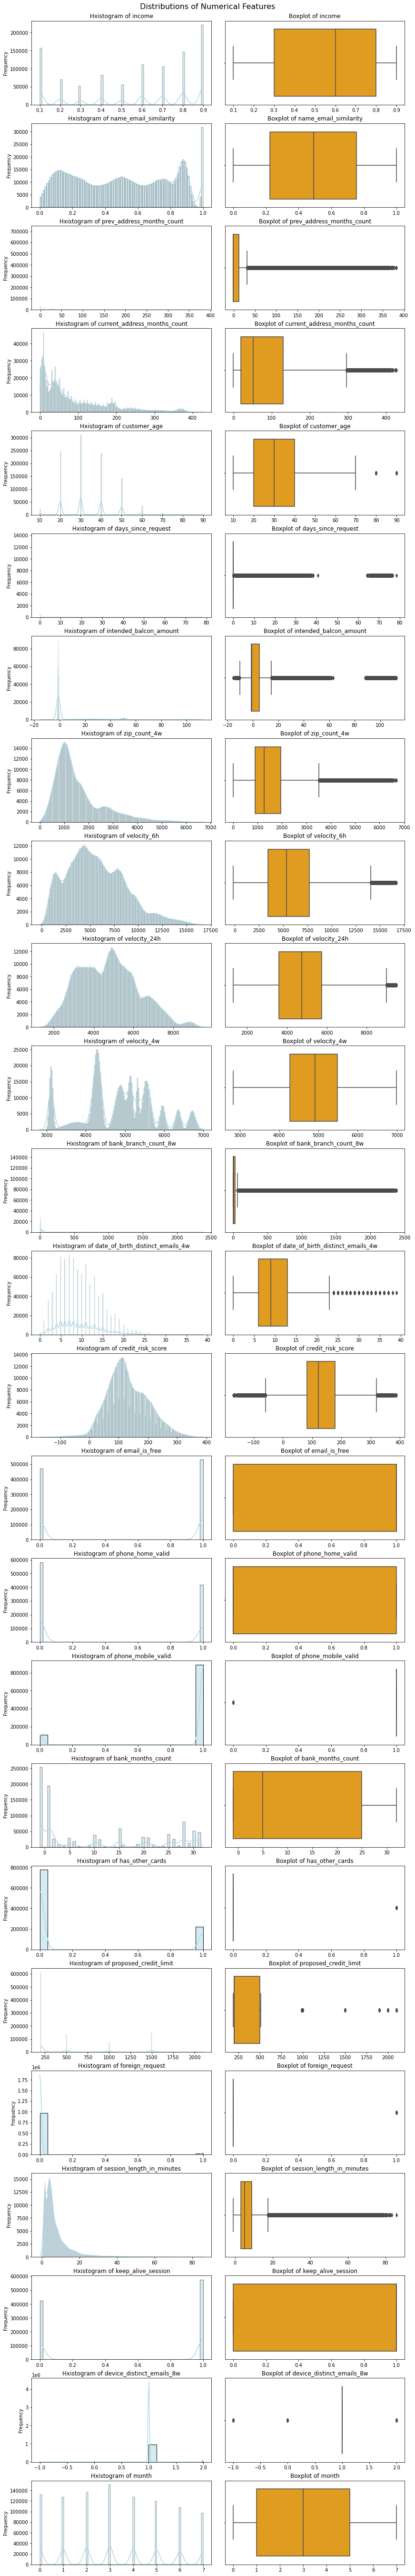

In [9]:
num_numerical = len(numerical_features)


fig, axes = plt.subplots(
    num_numerical, 2,
    figsize=(12, num_numerical *3),
    constrained_layout=True
)


for i, feature in enumerate(numerical_features):
    #Histogram

    sns.histplot(df[feature], ax=axes[i][0], kde=True, color='lightblue')
    axes[i][0].set_title(f"Hxistogram of {feature}")
    axes[i][0].set_xlabel("")
    axes[i][0].set_ylabel("Frequency")

    #Boxplot
    sns.boxplot(x=df[feature], ax=axes[i][1], color='orange')
    axes[i][1].set_title(f"Boxplot of {feature}")
    axes[i][1].set_xlabel("")

plt.suptitle("Distributions of Numerical Features", fontsize=16)
plt.show()


### Distribution Visualization of Numerical Features

This block of code generates visual summaries for each numerical feature in our dataset using both histograms and boxplots. These plots help us understand the shape, spread, and potential outliers in our data.

**What the code does:**
- Uses `subplots()` to create a vertically stacked grid with two columns: one for histograms and one for boxplots.
- For each numerical feature:
  - Plots a histogram to show the distribution and shape of the data.
  - Plots a boxplot to highlight the median, interquartile range, and outliers.

**Why it's useful:**
- **Histograms** help us identify skewness, modality (e.g. bimodal patterns), and general distribution shapes.
- **Boxplots** make it easy to detect outliers, which can affect model performance or scaling.

This step provides a clear visual understanding of how each numerical feature behaves and helps inform any necessary preprocessing, such as normalization, transformation, or outlier treatment.


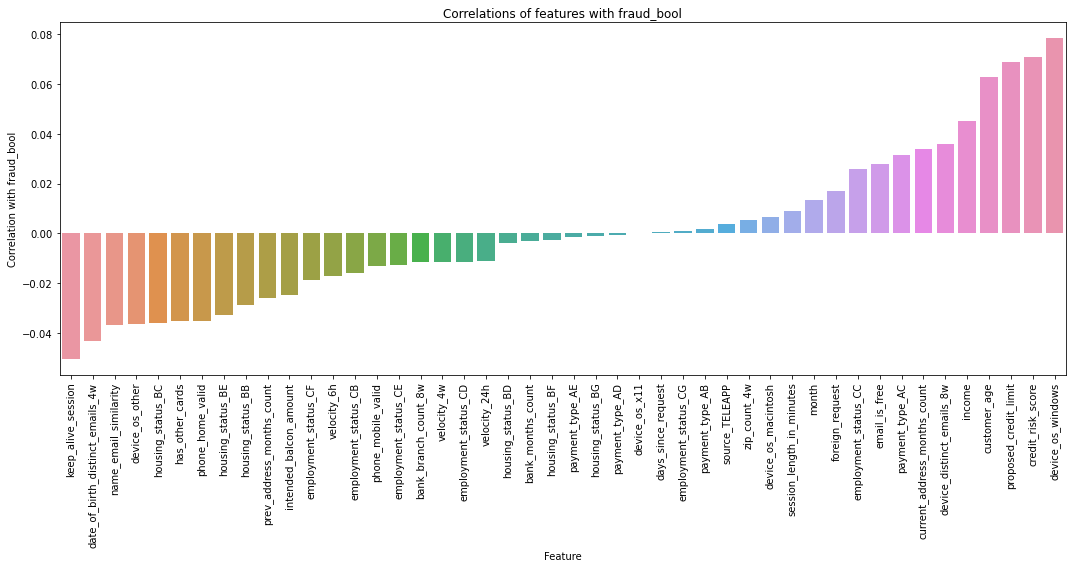

In [10]:
df_oh_encoded = pd.get_dummies(df, drop_first = True)

correlations = df_oh_encoded.corr()[target].drop(target).sort_values()

#Plot correlations
plt.figure(figsize=(15, 8))
sns.barplot(x = correlations.index, y = correlations.values)

plt.xticks(rotation=90)
plt.ylabel('Correlation with fraud_bool')
plt.xlabel('Feature')
plt.title('Correlations of features with fraud_bool')
plt.tight_layout()
plt.show()


### Correlation of Features with Target (fraud_bool)

This block encodes categorical variables, computes feature correlations with the target variable (`fraud_bool`), and visualizes those correlations in a bar plot.

**What this does:**
- `pd.get_dummies()` one-hot encodes all categorical columns. The `drop_first=True` argument avoids multicollinearity by removing one level from each category.
- The correlation matrix is computed using `.corr()`, and only the correlations with `fraud_bool` are kept.
- These correlations are sorted and plotted using a horizontal bar chart.

**Why this is important:**
- The plot helps us identify which features are most positively or negatively associated with fraud.
- Features like `device_fraud_count`, `device_os_windows`, `credit_risk_score`, and `proposed_credit_limit` have relatively strong positive correlations with fraud.
- On the other hand, features such as `keep_alive_session` and `date_of_birth_distinct_emails_4w` show negative correlations.

This visualization helps prioritize which features might be important during model training or which might require deeper inspection or transformation.


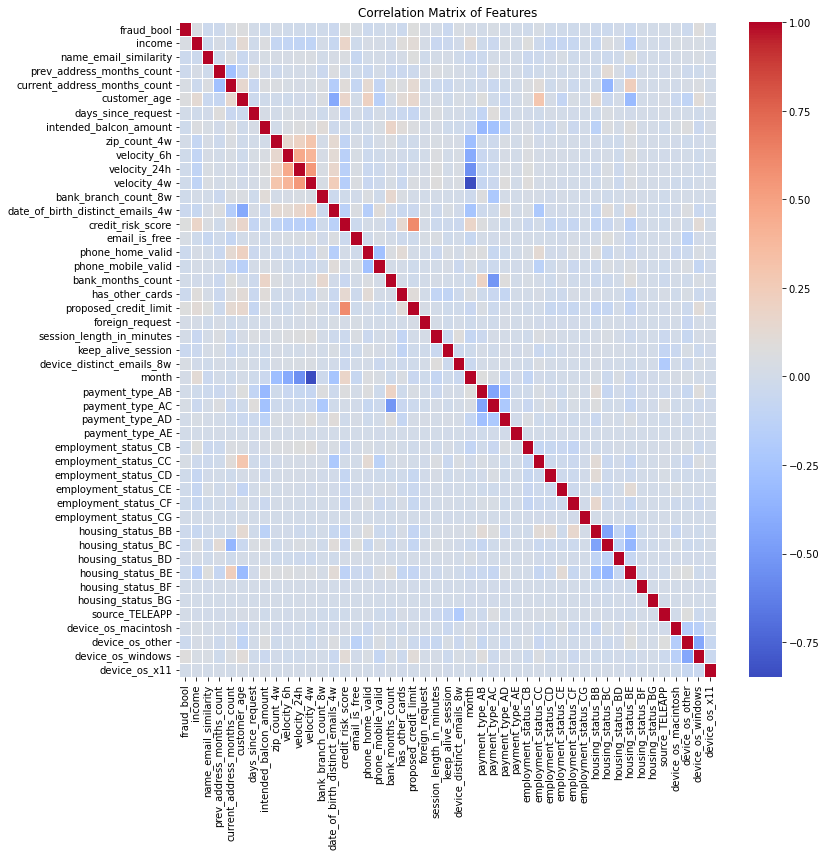

In [11]:
corr_matrix = df_oh_encoded.corr()

plt.figure(figsize=(12, 12))

sns.heatmap(corr_matrix, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix of Features")
plt.tight_layout()
plt.show()

### Correlation Heatmap of All Features

This heatmap provides a complete view of pairwise Pearson correlations between all features in our dataset, including one-hot encoded variables.

The diagonal shows a perfect correlation of 1.0, since each feature is perfectly correlated with itself. Off-diagonal values help us identify:

- **Multicollinearity**: Pairs of features that are highly correlated (positively or negatively). For example, several velocity features and some employment or housing statuses show clusters of correlation.
- **Redundant Features**: Features with very strong linear relationships may not both be necessary for modeling and could potentially be dropped or combined.
- **Target Associations**: The first row shows how strongly each feature correlates with the target `fraud_bool`.

The `coolwarm` colormap helps visualize the direction and strength of relationships:
- Red = strong positive correlation
- Blue = strong negative correlation
- White/neutral = little or no linear relationship

This visualization supports better feature selection and alerts us to potential issues like redundancy that could affect model performance.

### Checking for Features with `-1` Representing Missing Values

In some datasets, missing values aren’t always labeled as `NaN` or left blank. Instead, a special value like `-1` is used to indicate that the data is unavailable or not provided. In our dataset, we noticed that certain features use `-1` to represent missing values. This can lead to incorrect interpretations if we treat `-1` as a real value, so it’s important to identify and handle them appropriately.

To do this, we focused on five specific columns where we expect missing data to be marked as `-1`:
- `device_distinct_emails_8w`
- `current_address_months_count`
- `session_length_in_minutes`
- `bank_months_count`
- `prev_address_months_count`

We wrote a loop that:
1. Counts how many rows contain `-1` in each of these columns.
2. Calculates what percentage of the entire dataset that count represents.

The results showed that some features have a small amount of missing data, like `device_distinct_emails_8w` (only 0.04%), while others like `prev_address_months_count` have a **very high** percentage of missing values — over 71%. Here’s a summary of the findings:

| Feature                     | Missing Values | Percentage Missing |
|-----------------------------|----------------|--------------------|
| prev_address_months_count   | 712,920        | 71.29%             |
| bank_months_count           | 253,635        | 25.36%             |
| current_address_months_count | 4,254         | 0.43%              |
| session_length_in_minutes   | 2,015          | 0.20%              |
| device_distinct_emails_8w   | 359            | 0.04%              |

### Why This Step Matters

Identifying these patterns helps us make decisions:
- If a feature has a **very high percentage** of missing values (like 70%+), we may want to consider removing it entirely, since it might not be reliable.
- For features with **low to moderate** missing values, we can fill in the gaps (impute) using strategies like replacing them with the mean, median, or a prediction model.

This analysis helps ensure our data is clean and that our machine learning model won't learn misleading patterns from invalid data.


In [12]:

cols_with_negative_one = [
    'device_distinct_emails_8w',
    'current_address_months_count',
    'session_length_in_minutes',
    'bank_months_count',
    'prev_address_months_count'
]

print(f"\n=== Missing Values Analysis (encoded as -1) ===")
for col in cols_with_negative_one:
    if col in X_train.columns:
        n_missing = (X_train[col] == -1).sum()
        pct_missing = 100 * n_missing / len(X_train)
        print(f"{col}: {n_missing:,} ({pct_missing:.2f}%)")

# Replace -1 with NaN for proper imputation
for col in cols_with_negative_one:
    if col in X_train.columns:
        X_train[col] = X_train[col].replace(-1, np.nan)
        X_test[col] = X_test[col].replace(-1, np.nan)



=== Missing Values Analysis (encoded as -1) ===
device_distinct_emails_8w: 309 (0.04%)
current_address_months_count: 3,027 (0.38%)
session_length_in_minutes: 1,513 (0.19%)
bank_months_count: 199,549 (25.10%)
prev_address_months_count: 568,423 (71.50%)


In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

cat_cols = [col for col in categorical_features if col in X_train.columns]
num_cols = [col for col in X_train.columns if col not in cat_cols]

print(f"\n=== Preprocessing ===")
print(f"Numerical columns to process: {len(num_cols)}")
print(f"Categorical columns to process: {len(cat_cols)}")

# Handle numerical features
# Fill missing values with median
for col in num_cols:
    if X_train[col].isnull().any():
        median_val = X_train[col].median()
        X_train[col] = X_train[col].fillna(median_val)
        X_test[col] = X_test[col].fillna(median_val)

# Handle categorical features
# Fill missing values with mode
for col in cat_cols:
    if X_train[col].isnull().any():
        mode_val = X_train[col].mode()[0]
        X_train[col] = X_train[col].fillna(mode_val)
        X_test[col] = X_test[col].fillna(mode_val)

# One-hot encode categorical features
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first')

ohe_train = pd.DataFrame(
    ohe.fit_transform(X_train[cat_cols]),
    index=X_train.index,
    columns=ohe.get_feature_names_out(cat_cols)
)

ohe_test = pd.DataFrame(
    ohe.transform(X_test[cat_cols]),
    index=X_test.index,
    columns=ohe.get_feature_names_out(cat_cols)
)

# Combine numerical and encoded categorical features
X_train_processed = pd.concat([X_train[num_cols], ohe_train], axis=1)
X_test_processed = pd.concat([X_test[num_cols], ohe_test], axis=1)

# Ensure column names are strings
X_train_processed.columns = X_train_processed.columns.astype(str)
X_test_processed.columns = X_test_processed.columns.astype(str)

print(f"\nProcessed feature count: {X_train_processed.shape[1]}")
print(f"Sample features: {list(X_train_processed.columns[:10])}")


=== Preprocessing ===
Numerical columns to process: 24
Categorical columns to process: 5


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



Processed feature count: 45
Sample features: ['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h']


In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_processed)
X_test_scaled = scaler.transform(X_test_processed)

# Convert back to DataFrame for easier inspection
X_train_final = pd.DataFrame(
    X_train_scaled, 
    columns=X_train_processed.columns,
    index=X_train_processed.index
)

X_test_final = pd.DataFrame(
    X_test_scaled,
    columns=X_test_processed.columns,
    index=X_test_processed.index
)

print("\n=== Data After Scaling ===")
print(X_train_final.describe().round(2).iloc[:, :5])  # Show first 5 columns
print(f"\nData is ready for modeling!")
print(f"Training shape: {X_train_final.shape}")
print(f"Test shape: {X_test_final.shape}")


=== Data After Scaling ===
          income  name_email_similarity  prev_address_months_count  \
count  794989.00              794989.00                  794989.00   
mean       -0.00                  -0.00                      -0.00   
std         1.00                   1.00                       1.00   
min        -1.53                  -1.72                      -0.96   
25%        -0.85                  -0.93                      -0.22   
50%         0.18                   0.00                      -0.22   
75%         0.87                   0.91                      -0.22   
max         1.21                   1.72                       9.27   

       current_address_months_count  customer_age  
count                     794989.00     794989.00  
mean                           0.00         -0.00  
std                            1.00          1.00  
min                           -0.98         -1.96  
25%                           -0.75         -1.13  
50%                          

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

model = LogisticRegression(random_state = 42, max_iter = 1000, class_weight = "balanced")
model.fit(X_train_final, y_train)
y_pred_proba = model.predict_proba(X_test_final)[:, 1]

prob_threshold = 0.85
y_pred_custom = (y_pred_proba >= prob_threshold).astype(int)

print(f"Classification Report\n")
print(classification_report(y_test, y_pred_custom))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.98      0.98    202133
           1       0.17      0.35      0.23      2878

    accuracy                           0.97    205011
   macro avg       0.58      0.66      0.61    205011
weighted avg       0.98      0.97      0.97    205011


ROC AUC Score: 0.8765656404398446


In [16]:
import sys
!{sys.executable} -m pip install xgboost

In [17]:
# XGBoost Model with Optimal Threshold (NO SCALING)
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import numpy as np


# Calculate exact scale_pos_weight
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(f"Exact scale_pos_weight: {scale_pos_weight:.5f}")

xgb_model = xgb.XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)


xgb_model.fit(X_train_processed, y_train)  # Use X_train_processed, NOT X_train_final
xgb_pred_proba = xgb_model.predict_proba(X_test_processed)[:, 1]  # Use X_test_processed

# Find threshold at 5% FPR
fpr, tpr, thresholds = roc_curve(y_test, xgb_pred_proba)
target_fpr = 0.05
idx = np.argmin(np.abs(fpr - target_fpr))
prob_threshold = thresholds[idx]

xgb_pred_custom = (xgb_pred_proba >= prob_threshold).astype(int)

print(f"XGBoost Classification Report (UNSCALED DATA)")
print(f"Threshold at ~5% FPR: {prob_threshold:.4f}")
print(f"TPR at this threshold: {tpr[idx]:.4f}\n")
print(classification_report(y_test, xgb_pred_custom))
print("\nROC AUC Score:", roc_auc_score(y_test, xgb_pred_proba))

Exact scale_pos_weight: 96.53270
XGBoost Classification Report (UNSCALED DATA)
Threshold at ~5% FPR: 0.7663
TPR at this threshold: 0.5278

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.13      0.53      0.21      2878

    accuracy                           0.94    205011
   macro avg       0.56      0.74      0.59    205011
weighted avg       0.98      0.94      0.96    205011


ROC AUC Score: 0.886637980916156


In [18]:
import sys
!{sys.executable} -m pip install lightgbm

In [19]:
# LightGBM Model with Optimal Threshold
import lightgbm as lgb
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import numpy as np

# Calculate scale_pos_weight for class imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

lgb_model = lgb.LGBMClassifier(
    scale_pos_weight=scale_pos_weight,
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)

lgb_model.fit(X_train_final, y_train)
lgb_pred_proba = lgb_model.predict_proba(X_test_final)[:, 1]

# Find threshold at 5% FPR
fpr, tpr, thresholds = roc_curve(y_test, lgb_pred_proba)
target_fpr = 0.05
idx = np.argmin(np.abs(fpr - target_fpr))
prob_threshold = thresholds[idx]

lgb_pred_custom = (lgb_pred_proba >= prob_threshold).astype(int)

print(f"LightGBM Classification Report")
print(f"Threshold at ~5% FPR: {prob_threshold:.4f}")
print(f"TPR at this threshold: {tpr[idx]:.4f}\n")
print(classification_report(y_test, lgb_pred_custom))
print("\nROC AUC Score:", roc_auc_score(y_test, lgb_pred_proba))

[LightGBM] [Info] Number of positive: 8151, number of negative: 786838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3248
[LightGBM] [Info] Number of data points in the train set: 794989, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.010253 -> initscore=-4.569882
[LightGBM] [Info] Start training from score -4.569882
LightGBM Classification Report
Threshold at ~5% FPR: 0.8625
TPR at this threshold: 0.4715

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.12      0.47      0.19      2878

    accuracy                           0.94    205011
   macro avg       0.56      0.71      0.58    205011
weighted avg       0.98      0.94      0.96    205011


ROC AUC Score: 0.86681

In [20]:
import joblib

print("\n" + "="*60)
print("SAVING MODELS")
print("="*60)

# Save XGBoost model
joblib.dump(xgb_model, 'fraud_detector_xgboost.joblib')
print("Saved: fraud_detector_xgboost.joblib")

# Save LightGBM model
joblib.dump(lgb_model, 'fraud_detector_lightgbm.joblib')
print("Saved: fraud_detector_lightgbm.joblib")

# Save preprocessing objects
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(ohe, 'onehot_encoder.joblib')
print("Saved: scaler.joblib")
print("Saved: onehot_encoder.joblib")

# Save the optimal thresholds
thresholds_info = {
    'xgboost_threshold': prob_threshold,
    'xgboost_tpr': tpr[idx],
    'target_fpr': 0.05,
    'categorical_columns': cat_cols,
    'numerical_columns': num_cols
}
joblib.dump(thresholds_info, 'model_info.joblib')
print("Saved: model_info.joblib")

print("\nAll models saved successfully!")


SAVING MODELS
Saved: fraud_detector_xgboost.joblib
Saved: fraud_detector_lightgbm.joblib
Saved: scaler.joblib
Saved: onehot_encoder.joblib
Saved: model_info.joblib

All models saved successfully!


In [21]:
# Model Comparison Summary
print("\n" + "="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)

summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'XGBoost', 'LightGBM'],
    'ROC-AUC': [
        roc_auc_score(y_test, y_pred_proba),  # From logistic regression
        roc_auc_score(y_test, xgb_pred_proba),  # From XGBoost
        roc_auc_score(y_test, lgb_pred_proba)   # From LightGBM
    ],
    'TPR@5%FPR': [
        'N/A',  # Calculate if you want
        tpr[idx],  # From your XGBoost result
        'N/A'   # Calculate from LightGBM if you want
    ]
})

print(summary.to_string(index=False))
print("\n" + "="*60)


MODEL COMPARISON SUMMARY
              Model  ROC-AUC TPR@5%FPR
Logistic Regression 0.876566       N/A
            XGBoost 0.886638  0.471508
           LightGBM 0.866813       N/A



---